In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz  
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
import numpy as np
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv("synth_seg.csv")
data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Columns: 112 entries, Subject to decision
dtypes: float64(110), int64(2)
memory usage: 290.6 KB


(None,
    Subject  neuropsych_score  general white matter  general grey matter  \
 0        2               1.0                0.8447               0.7411   
 1        3               3.5                0.8416               0.7227   
 2        5               1.0                0.8396               0.7105   
 3        7               2.5                0.8238               0.7156   
 4        8               3.0                0.8331               0.7294   
 
    general csf  cerebellum  brainstem  thalamus  putamen+pallidum  \
 0       0.7017      0.8748     0.8858    0.8378            0.8833   
 1       0.8552      0.8845     0.8950    0.8589            0.8346   
 2       0.8700      0.8879     0.8659    0.8699            0.8428   
 3       0.8572      0.8858     0.8667    0.8538            0.8415   
 4       0.8803      0.9038     0.8927    0.8735            0.8610   
 
    hippocampus+amygdala  ...  ctx-rh-rostralmiddlefrontal  \
 0                0.8592  ...                    10

 First let's check if there some mssing values in the given data

In [4]:
# Checking for missing values
data.isnull().sum()

Subject                      0
neuropsych_score             0
general white matter         0
general grey matter          0
general csf                  0
                            ..
ctx-rh-frontalpole           0
ctx-rh-temporalpole          0
ctx-rh-transversetemporal    0
ctx-rh-insula                0
decision                     0
Length: 112, dtype: int64

So we can see that there are no missing values in the given dataset.

In [5]:
# Summary statistics
data.describe()

,Subject,neuropsych_score,general white matter,general grey matter,general csf,cerebellum,brainstem,thalamus,putamen+pallidum,hippocampus+amygdala,...,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula,decision
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,...,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,198.960843,2.802108,0.833015,0.714028,0.831356,0.889377,0.882566,0.854028,0.848433,0.821061,...,11830.831343,19671.516494,13295.604286,10592.364030,10495.707030,2948.956271,3991.795524,2444.256380,7384.421006,0.725904
std,113.766158,0.790748,0.025537,0.023181,0.066975,0.043462,0.052285,0.046210,0.036091,0.048786,...,2059.046957,3618.512360,2217.192213,1650.606308,1742.735045,400.373545,487.786114,275.192642,1193.649763,0.446731
min,2.000000,1.000000,0.486800,0.530100,0.234200,0.338600,0.087500,0.088500,0.335800,0.116100,...,4764.623000,4525.302000,5408.869000,3543.280000,3516.627000,1130.366000,2232.307000,1661.269000,3853.230000,0.000000
25%,100.750000,2.500000,0.826200,0.704675,0.812475,0.880550,0.873100,0.847350,0.838675,0.812300,...,10401.999500,17377.980000,12014.274000,9519.213000,9369.284000,2693.888750,3706.292500,2316.701250,6500.155500,0.000000
50%,198.500000,3.000000,0.835100,0.718050,0.846450,0.892750,0.887100,0.858550,0.852150,0.826650,...,11711.550000,19775.341500,13313.153500,10560.500500,10447.196000,2947.229500,3966.254500,2452.162000,7358.928000,1.000000
75%,298.250000,3.500000,0.844100,0.728475,0.873550,0.905675,0.898900,0.868250,0.865425,0.837300,...,13090.482500,21816.228750,14385.291750,11628.899250,11563.585000,3184.194000,4260.814500,2559.552000,8116.163000,1.000000
max,391.000000,5.000000,0.887000,0.762800,0.921200,0.946400,0.929800,0.899500,0.901300,0.872200,...,19464.322000,47826.050000,35859.164000,16912.467000,21711.764000,5951.063000,7966.422000,5935.208000,15349.807000,1.000000


In [6]:
print(data.agg(['min', 'max']))

     Subject  neuropsych_score  general white matter  general grey matter  \
min        2               1.0                0.4868               0.5301   
max      391               5.0                0.8870               0.7628   

     general csf  cerebellum  brainstem  thalamus  putamen+pallidum  \
min       0.2342      0.3386     0.0875    0.0885            0.3358   
max       0.9212      0.9464     0.9298    0.8995            0.9013   

     hippocampus+amygdala  ...  ctx-rh-rostralmiddlefrontal  \
min                0.1161  ...                     4764.623   
max                0.8722  ...                    19464.322   

     ctx-rh-superiorfrontal  ctx-rh-superiorparietal  ctx-rh-superiortemporal  \
min                4525.302                 5408.869                 3543.280   
max               47826.050                35859.164                16912.467   

     ctx-rh-supramarginal  ctx-rh-frontalpole  ctx-rh-temporalpole  \
min              3516.627            1130.366     

In [8]:
# Exclude 'decision' column from the data for skewness check
features = data.drop('decision', axis=1)

# Calculate skewness for each feature
skewness = features.apply(lambda x: skew(x.dropna()), axis=0)

# List features with skewness > 1 or < -1
skewed_features = skewness[(skewness > 1) | (skewness < -1)]
print("Skewed features:", skewed_features)

# Apply log transformation to skewed features (exclude 'decision')
for feature in skewed_features.index:
    #data[feature] = np.log1p(data[feature])
    #data[feature] = np.log10(1 + data[feature])
    data[feature] = np.log10(1 + np.log10(1 + data[feature]))

# Ensure target variable is not transformed
y = data['decision']

Skewed features: general white matter                -9.000797
general grey matter                 -2.958830
general csf                         -3.820643
cerebellum                         -10.206320
brainstem                          -13.210532
thalamus                           -15.268007
putamen+pallidum                   -10.315493
hippocampus+amygdala               -12.133621
left inferior lateral ventricle     -3.924302
left caudate                         2.063956
4th ventricle                       -2.100141
left hippocampus                   -13.765123
left amygdala                      -14.352203
right inferior lateral ventricle    -1.946530
right hippocampus                   -6.180767
ctx-lh-bankssts                      1.182856
ctx-lh-inferiorparietal              1.138731
ctx-lh-isthmuscingulate              1.397596
ctx-lh-lateralorbitofrontal         -1.771767
ctx-lh-posteriorcingulate            1.212959
ctx-lh-precentral                   -2.877402
ctx-lh-superiorfr

Many features seem to have different scales like ctx-rh-rostralmiddlefrontal has much larger values than others. Normalize or standardize the feature values to bring them into a similar range.

In [10]:
# Separating features and target variable
X = data.drop(['decision', 'Subject'], axis=1)
y = data['decision']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
data.head()

,Subject,neuropsych_score,general white matter,general grey matter,general csf,cerebellum,brainstem,thalamus,putamen+pallidum,hippocampus+amygdala,...,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula,decision
0,2,1.0,0.042342,0.038902,0.037513,0.043289,0.043629,0.042122,0.043552,0.042801,...,10669.916,0.235473,4.046268,9989.008,10204.809,3.512508,3.577394,0.215657,6615.042,1
1,3,3.5,0.042244,0.038259,0.042675,0.043589,0.043911,0.042792,0.042020,0.041843,...,11916.219,0.235944,4.135850,10683.854,10620.936,3.539956,3.602743,0.215494,7678.198,0
2,5,1.0,0.042180,0.037827,0.043139,0.043694,0.043011,0.043136,0.042282,0.041383,...,11767.281,0.238012,4.147490,12702.073,14000.088,3.466697,3.657543,0.216857,8775.241,1
3,7,2.5,0.041672,0.038008,0.042738,0.043629,0.043036,0.042631,0.042240,0.041552,...,10520.404,0.235653,4.075167,9549.347,8989.768,3.440824,3.595679,0.213891,6334.908,1
4,8,3.0,0.041972,0.038495,0.043459,0.044180,0.043841,0.043248,0.042858,0.042026,...,12139.327,0.236686,4.189565,11649.476,12827.261,3.512430,3.628304,0.215786,8334.959,1


Variables with low variation (close to constant) can be identified using the coefficient of variation. If the variation is very low we consider removing these features.

In [12]:
# Calculate variation (standard deviation / mean)
variation = X.apply(lambda x: np.std(x) / np.mean(x))

# List variables with very low variation
low_variation_features = variation[variation < 0.01]  # Threshold for low variation can be adjusted
print("Features with low variation:\n", low_variation_features.index)

# Optionally drop low variation features
X_dropped = X.drop(low_variation_features.index, axis=1)


Features with low variation:
 Index(['total intracranial', 'left cerebral cortex', 'left caudate',
       'right cerebral cortex', 'right hippocampus', 'ctx-lh-bankssts',
       'ctx-lh-inferiorparietal', 'ctx-lh-isthmuscingulate',
       'ctx-lh-lateralorbitofrontal', 'ctx-lh-posteriorcingulate',
       'ctx-lh-precentral', 'ctx-lh-superiorfrontal', 'ctx-lh-frontalpole',
       'ctx-rh-inferiortemporal', 'ctx-rh-parsopercularis',
       'ctx-rh-pericalcarine', 'ctx-rh-precentral', 'ctx-rh-precuneus',
       'ctx-rh-superiorfrontal', 'ctx-rh-transversetemporal'],
      dtype='object')


Let's Calculate the Pearson correlation of each feature with the target variable. Features with high correlation can be considered for removal.

In [13]:
# Calculate correlation with target variable 'decision'
correlations_with_target = data.corr()['decision'].drop('decision')

# List features highly correlated with target (e.g., above 0.8)
high_corr_features = correlations_with_target[abs(correlations_with_target) > 0.8]
print("Features highly correlated with target:", high_corr_features)

# Optionally remove features correlated with target
X_uncorrelated = X.drop(high_corr_features.index, axis=1)


Features highly correlated with target: Series([], Name: decision, dtype: float64)


Let's Study Correlation in the Data
A correlation matrix can help visualize relationships between features.

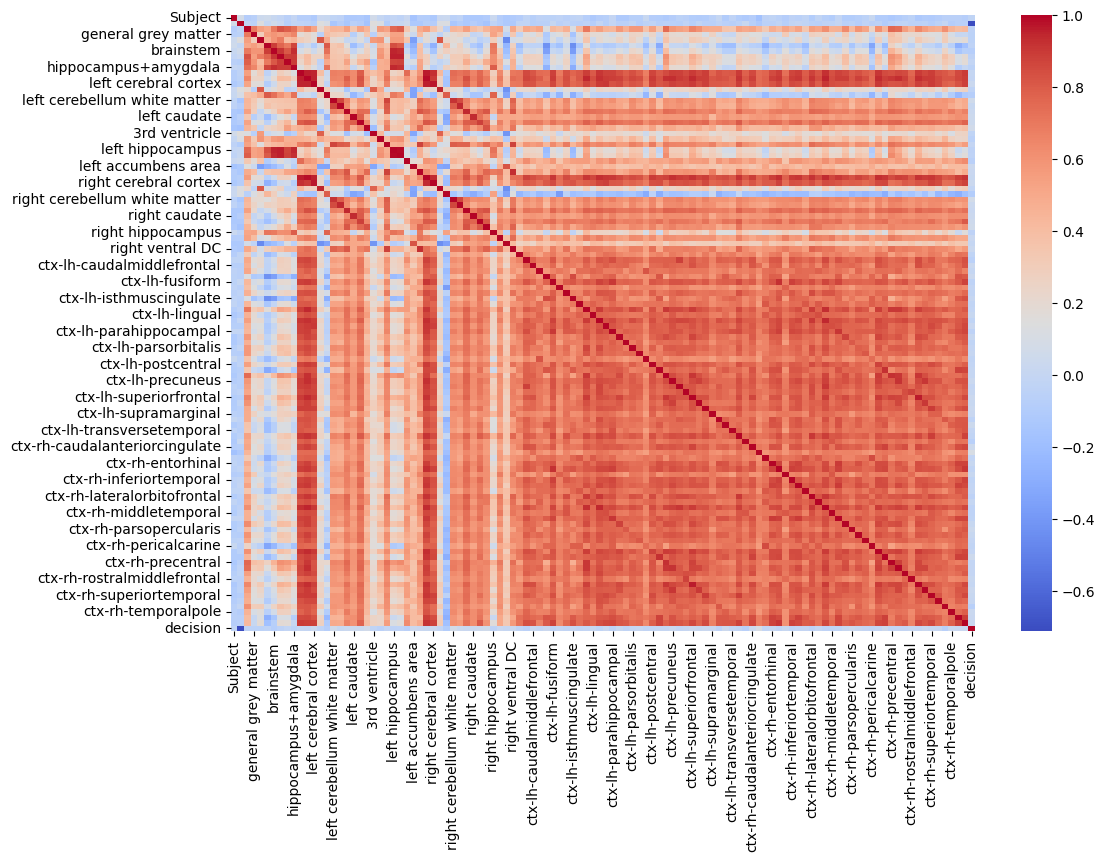

In [14]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()
#plt.savefig('Correlation.png')

Number of features with correlation above 0.85: 65
Number of features with correlation above 0.9: 36
Number of features with correlation above 0.95: 8


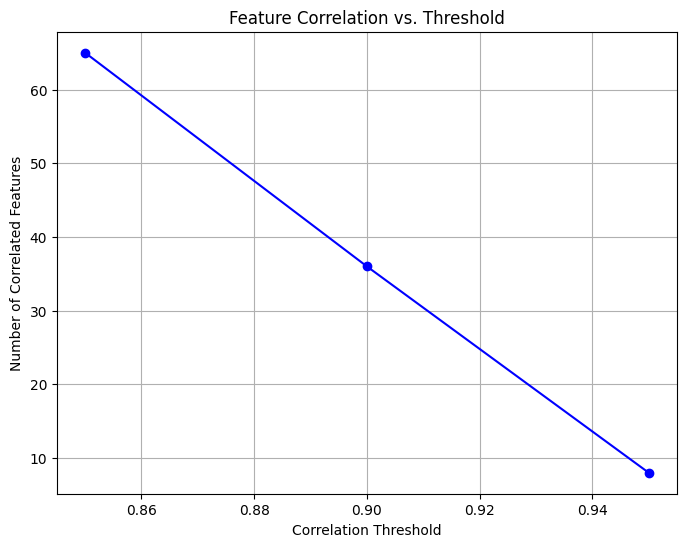

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (assumes data is already loaded as `data`)
# Assuming you have dropped target variable 'decision' from feature set
corr_matrix = data.corr()

# Thresholds to test
thresholds = [0.85, 0.9, 0.95]

# Initialize list to store the number of correlated features at each threshold
num_correlated_features = []

# For each threshold, count the number of features that have correlations above the threshold
for threshold in thresholds:
    # Get the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Count the number of features that have correlations greater than the threshold
    correlated_features = [column for column in upper.columns if any(upper[column] > threshold)]
    
    num_correlated_features.append(len(correlated_features))
    print(f"Number of features with correlation above {threshold}: {len(correlated_features)}")

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(thresholds, num_correlated_features, marker='o', linestyle='-', color='b')
plt.xlabel('Correlation Threshold')
plt.ylabel('Number of Correlated Features')
plt.title('Feature Correlation vs. Threshold')
plt.grid(True)
#plt.show()
plt.savefig('Feature Correlation vs Threshold.png')

In [16]:
# Remove highly correlated features based on a threshold
threshold = 0.9
corr_matrix = data.corr()

# Get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of features with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print("Features to drop due to high correlation:\n", to_drop)

# Drop the features
data_reduced = data.drop(to_drop, axis=1)

Features to drop due to high correlation:
 ['thalamus', 'hippocampus+amygdala', 'left cerebral white matter', 'left cerebral cortex', 'left hippocampus', 'left amygdala', 'right cerebral white matter', 'right cerebral cortex', 'right lateral ventricle', 'right cerebellum white matter', 'right cerebellum cortex', 'right thalamus', 'right caudate', 'right ventral DC', 'ctx-lh-fusiform', 'ctx-lh-lateralorbitofrontal', 'ctx-lh-medialorbitofrontal', 'ctx-lh-middletemporal', 'ctx-lh-parahippocampal', 'ctx-lh-precentral', 'ctx-lh-precuneus', 'ctx-lh-superiorfrontal', 'ctx-lh-insula', 'ctx-rh-fusiform', 'ctx-rh-isthmuscingulate', 'ctx-rh-lateralorbitofrontal', 'ctx-rh-medialorbitofrontal', 'ctx-rh-parahippocampal', 'ctx-rh-postcentral', 'ctx-rh-posteriorcingulate', 'ctx-rh-precentral', 'ctx-rh-precuneus', 'ctx-rh-superiorfrontal', 'ctx-rh-superiorparietal', 'ctx-rh-superiortemporal', 'ctx-rh-insula']


In [17]:
data_reduced.head()

,Subject,neuropsych_score,general white matter,general grey matter,general csf,cerebellum,brainstem,putamen+pallidum,total intracranial,left lateral ventricle,...,ctx-rh-parsorbitalis,ctx-rh-parstriangularis,ctx-rh-pericalcarine,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,decision
0,2,1.0,0.042342,0.038902,0.037513,0.043289,0.043629,0.043552,6.176952,3.613737,...,3.664333,3.733780,0.216397,3.471094,10669.916,10204.809,3.512508,3.577394,0.215657,1
1,3,3.5,0.042244,0.038259,0.042675,0.043589,0.043911,0.042020,6.205566,4.377394,...,3.688243,3.782178,0.216473,3.464496,11916.219,10620.936,3.539956,3.602743,0.215494,0
2,5,1.0,0.042180,0.037827,0.043139,0.043694,0.043011,0.042282,6.239524,4.316691,...,3.707881,3.724185,0.217350,3.432065,11767.281,14000.088,3.466697,3.657543,0.216857,1
3,7,2.5,0.041672,0.038008,0.042738,0.043629,0.043036,0.042240,6.150641,4.094596,...,3.614994,3.687497,0.216045,3.395724,10520.404,8989.768,3.440824,3.595679,0.213891,1
4,8,3.0,0.041972,0.038495,0.043459,0.044180,0.043841,0.042858,6.240091,4.278479,...,3.701002,3.690434,0.215968,3.423580,12139.327,12827.261,3.512430,3.628304,0.215786,1


The data frame data_reduced consists of the data after performing correlation and removing the redundant data features.

In [18]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Subject                           332 non-null    int64  
 1   neuropsych_score                  332 non-null    float64
 2   general white matter              332 non-null    float64
 3   general grey matter               332 non-null    float64
 4   general csf                       332 non-null    float64
 5   cerebellum                        332 non-null    float64
 6   brainstem                         332 non-null    float64
 7   putamen+pallidum                  332 non-null    float64
 8   total intracranial                332 non-null    float64
 9   left lateral ventricle            332 non-null    float64
 10  left inferior lateral ventricle   332 non-null    float64
 11  left cerebellum white matter      332 non-null    float64
 12  left cer

Lets not use the reduced data for now until we analyse its impacts on the further analysis, Let's continue the next steps of analysis using the normal data.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

                       Feature        VIF
0             neuropsych_score   1.872326
1         general white matter  22.485382
2          general grey matter  10.372982
3                  general csf  53.637201
4                   cerebellum  26.350068
..                         ...        ...
105       ctx-rh-supramarginal  12.102425
106         ctx-rh-frontalpole   8.121803
107        ctx-rh-temporalpole   6.788358
108  ctx-rh-transversetemporal  25.550340
109              ctx-rh-insula  45.408065

[110 rows x 2 columns]


In [20]:
# Run PCA with 95% variance retention
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio by PCA components in the presence of correlated features:\n", pca.explained_variance_ratio_)

Explained variance ratio by PCA components in the presence of correlated features:
 [0.60053589 0.10166293 0.05245758 0.0262264  0.01770939 0.01526112
 0.01236303 0.01117487 0.00999816 0.00854884 0.00815482 0.00651911
 0.00589323 0.00561628 0.00508619 0.00460182 0.00455507 0.00446026
 0.00422533 0.00380823 0.00353853 0.00341556 0.00314098 0.00304472
 0.0029066  0.0027429  0.00271964 0.00263544 0.00250728 0.00245281
 0.00231187 0.00225025 0.00213836 0.00211907 0.00206689 0.00195343]


In [21]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

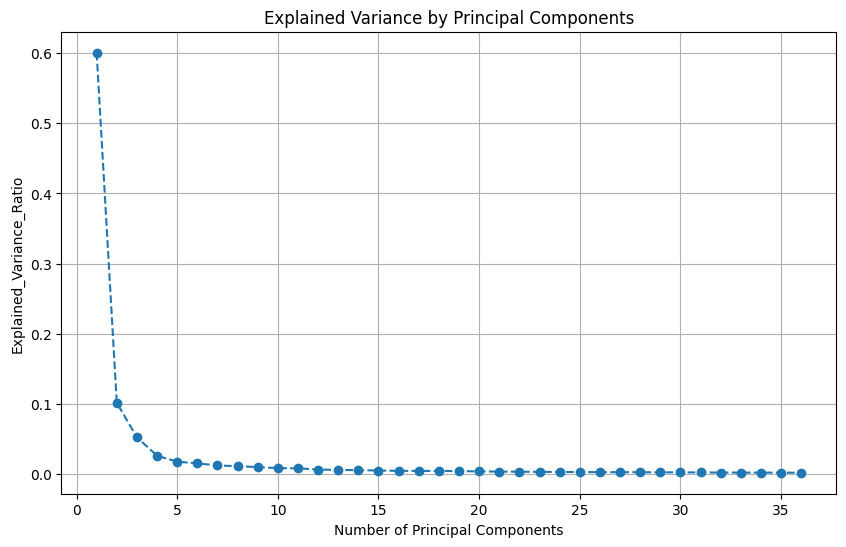

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained_Variance_Ratio')
plt.grid(True)
plt.show()

decision
1    241
0     91
Name: count, dtype: int64


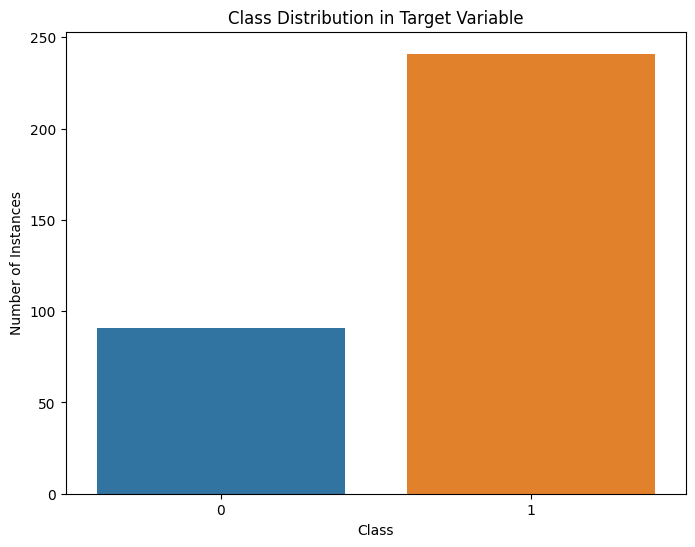

In [23]:
# Check the distribution of the target variable
class_counts = y.value_counts()
print(class_counts)

# Visualizing class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution in Target Variable")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.show()


In [24]:
# Calculate imbalance ratio (majority/minority)
minority_class_count = class_counts.min()
majority_class_count = class_counts.max()

imbalance_ratio = majority_class_count / minority_class_count
print(f"Imbalance Ratio (Majority/Minority): {imbalance_ratio:.2f}")


Imbalance Ratio (Majority/Minority): 2.65


In [25]:
# Oversampling using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Undersampling using RandomUnderSampler
undersampler = RandomUnderSampler()
X_under, y_under = undersampler.fit_resample(X_scaled, y)

In [26]:
print("Target variable after Over Sampling :",y_resampled.count())
print("Target variable after Under Sampling :",y_under.count())

Target variable after Over Sampling : 482
Target variable after Under Sampling : 182


Logistic Regresion with SMOTE

In [27]:
# Split the resampled data into train and test sets
from sklearn.model_selection import train_test_split
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression with class weights
model_smote = LogisticRegression(class_weight='balanced')
model_smote.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate model on resampled test set
y_pred_smote = model_smote.predict(X_test_resampled)


Logistic Regression with Undersampling

In [28]:
# Split the undersampled data into train and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

# Logistic Regression with class weights
model_under = LogisticRegression(class_weight='balanced')
model_under.fit(X_train_under, y_train_under)

# Predict and evaluate model on undersampled test set
y_pred_under = model_under.predict(X_test_under)

Logistic Regression with Class Weights on Original Data

In [29]:
# Split the original imbalanced data into train and test sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression with class weights
model_original = LogisticRegression(class_weight='balanced')
model_original.fit(X_train_original, y_train_original)

# Predict and evaluate model on original test set
y_pred_original = model_original.predict(X_test_original)

In [30]:
# Evaluate SMOTE model
print("SMOTE Model Performance:\n", classification_report(y_test_resampled, y_pred_smote))

# Evaluate Undersampling model
print("Undersampling Model Performance:\n", classification_report(y_test_under, y_pred_under))

# Evaluate Original model with class weights
print("Original Model Performance:\n", classification_report(y_test_original, y_pred_original))

SMOTE Model Performance:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.93      0.97        45

    accuracy                           0.97        97
   macro avg       0.97      0.97      0.97        97
weighted avg       0.97      0.97      0.97        97

Undersampling Model Performance:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.89      0.94        18

    accuracy                           0.95        37
   macro avg       0.95      0.94      0.95        37
weighted avg       0.95      0.95      0.95        37

Original Model Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        50

    accuracy                           1.00        67
   macro avg       1.00      1.00      

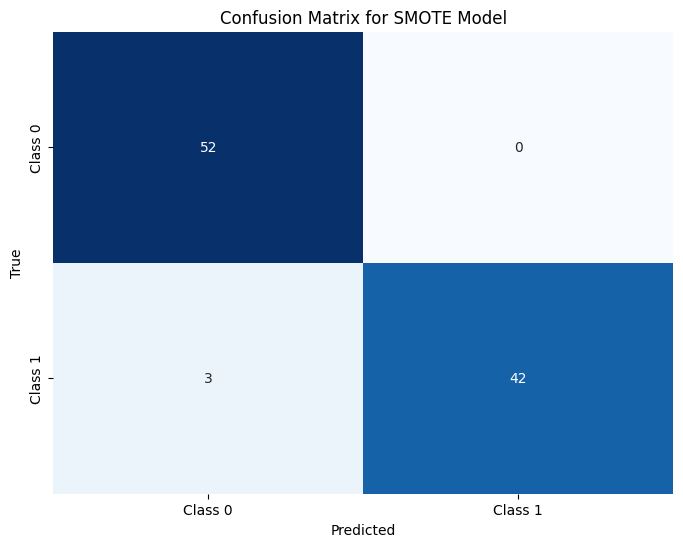

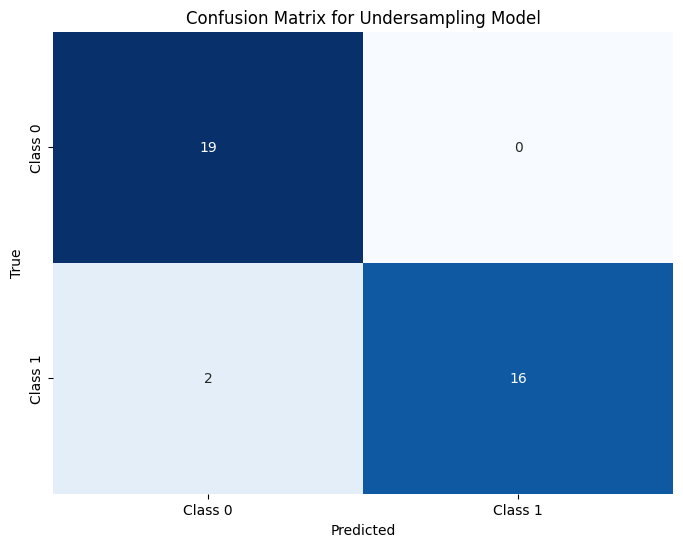

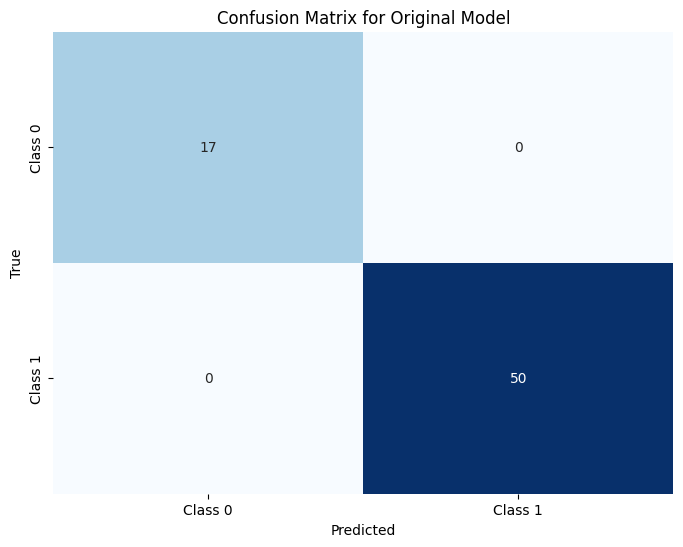

In [31]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test_resampled, y_pred_smote, "Confusion Matrix for SMOTE Model")
plot_confusion_matrix(y_test_under, y_pred_under, "Confusion Matrix for Undersampling Model")
plot_confusion_matrix(y_test_original, y_pred_original, "Confusion Matrix for Original Model")

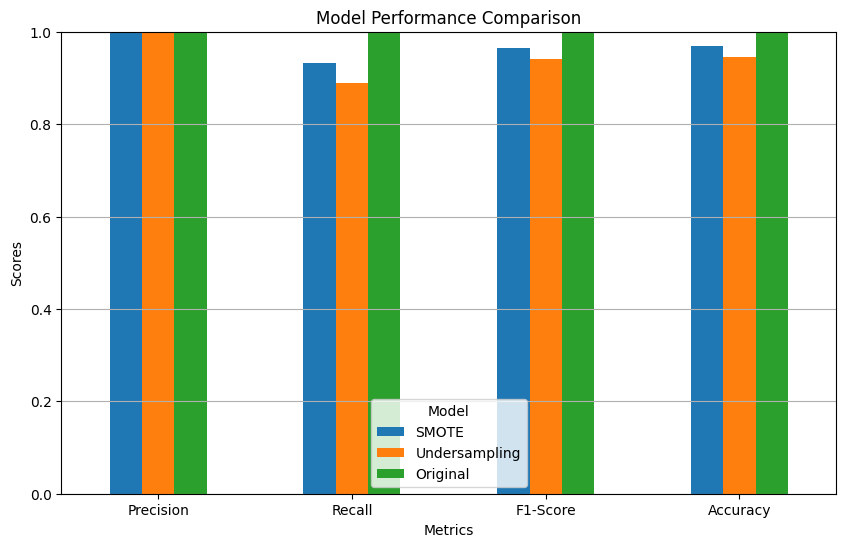

In [32]:
from sklearn.metrics import accuracy_score

# Generate classification reports
report_smote = classification_report(y_test_resampled, y_pred_smote, output_dict=True)
report_under = classification_report(y_test_under, y_pred_under, output_dict=True)
report_original = classification_report(y_test_original, y_pred_original, output_dict=True)

# Calculate accuracy for each model
accuracy_smote = accuracy_score(y_test_resampled, y_pred_smote)
accuracy_under = accuracy_score(y_test_under, y_pred_under)
accuracy_original = accuracy_score(y_test_original, y_pred_original)

# Prepare data for plotting, including accuracy
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
labels = ['SMOTE', 'Undersampling', 'Original']

# Collect metrics for each class
smote_metrics = [report_smote['1']['precision'], report_smote['1']['recall'], report_smote['1']['f1-score'], accuracy_smote]
under_metrics = [report_under['1']['precision'], report_under['1']['recall'], report_under['1']['f1-score'], accuracy_under]
original_metrics = [report_original['1']['precision'], report_original['1']['recall'], report_original['1']['f1-score'], accuracy_original]

# Create a DataFrame for better plotting
metric_df = pd.DataFrame({
    'Metrics': metrics,
    'SMOTE': smote_metrics,
    'Undersampling': under_metrics,
    'Original': original_metrics
})

# Plotting
metric_df.set_index('Metrics').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Model')
plt.grid(axis='y')
plt.show()


In [33]:
# Add a new 'Subject' column with row numbers in resampled data
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['decision'] = y_resampled
resampled_data.insert(0, 'Subject', range(1, len(resampled_data) + 1))  

# Add a new 'Subject' column with row numbers in undersampled data
undersampled_data = pd.DataFrame(X_under, columns=X.columns)
undersampled_data['decision'] = y_under
undersampled_data.insert(0, 'Subject', range(1, len(undersampled_data) + 1))  

In [106]:
resampled_data.to_csv("resampled_data.csv", index=False)#Oversampled Data
undersampled_data.to_csv("undersampled_data.csv", index=False)#Undersampled Data